# WeatherPy KateF
----

### Analysis 
* In Jan, the higher the latitude, the more extreme weather temperature variation occurs. For example, temp range at higher lats was -50 to +50'F, while at the equator, temps only ranged from 60-90'F. I know where I'd rather be! ~Warm, sweatin, it's hot up in this joint/Vokal tanktop, on at this point~
* There are fewer cities located at extreme latitudes - at least half of my sample sets contains the same cities over and over, e.g. Ushuaia, Argentina and Qaanaaq, Greenland. There are other cities near these two, but my guess is not all of them are in the Weather database. 
* Dangerous wind speeds (>30mph) are more likely at very high and low latitudes - hold on to your hats!


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import json
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# api_key
# if trouble with API key, may need to reset kernal


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up lists to hold reponse info
city = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Pull desired weather data for all cities in short list; do not exceed 60 requests a minute
for i in range (0, len(cities)):
    try:
        citylist = cities[i]
        searchcity = citylist.replace(" ", "%20")
        query_url = url + "appid=" + api_key + "&q=" + searchcity + "&units=" + "imperial"
        response = requests.get(query_url).json()
        city.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing Record {i+1}: {citylist}")
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")
 




Processing Record 1: mataura
Processing Record 2: winnemucca
Processing Record 3: hilo
Processing Record 4: birjand
Processing Record 5: cherskiy
Processing Record 6: beringovskiy
Processing Record 7: ayan
Processing Record 8: arman
Processing Record 9: mar del plata
City not found. Skipping...
Processing Record 11: albany
Processing Record 12: rochester
Processing Record 13: torbay
Processing Record 14: rudsar
Processing Record 15: nyaunglebin
Processing Record 16: puerto del rosario
Processing Record 17: hobart
Processing Record 18: luwuk
Processing Record 19: saint-philippe
Processing Record 20: busselton
Processing Record 21: itarema
City not found. Skipping...
Processing Record 23: punta arenas
Processing Record 24: carnarvon
Processing Record 25: wagar
Processing Record 26: ucluelet
Processing Record 27: lagoa
Processing Record 28: mayumba
Processing Record 29: ushuaia
Processing Record 30: airai
Processing Record 31: amalapuram
Processing Record 32: gornopravdinsk
Processing Rec

Processing Record 261: mana
Processing Record 262: coihaique
Processing Record 263: whitehorse
Processing Record 264: grand gaube
Processing Record 265: wangqing
Processing Record 266: tateyama
City not found. Skipping...
City not found. Skipping...
Processing Record 269: ahuimanu
Processing Record 270: wote
Processing Record 271: cabo san lucas
Processing Record 272: kaitangata
Processing Record 273: kavaratti
Processing Record 274: omboue
Processing Record 275: ban nahin
Processing Record 276: songea
Processing Record 277: cabadiangan
Processing Record 278: katsuura
Processing Record 279: bridlington
Processing Record 280: urdoma
Processing Record 281: chokurdakh
Processing Record 282: bonfim
Processing Record 283: comodoro rivadavia
Processing Record 284: vostok
Processing Record 285: georgetown
City not found. Skipping...
Processing Record 287: edea
Processing Record 288: fortuna
Processing Record 289: mikhaylovka
City not found. Skipping...
Processing Record 291: strezhevoy
Proces

City not found. Skipping...
City not found. Skipping...
Processing Record 520: puerto carreno
Processing Record 521: deder
Processing Record 522: paddhari
Processing Record 523: ancud
Processing Record 524: jacareacanga
Processing Record 525: lagunas
Processing Record 526: nabire
Processing Record 527: abu dhabi
City not found. Skipping...
Processing Record 529: sakaiminato
Processing Record 530: bratsk
Processing Record 531: dubbo
City not found. Skipping...
Processing Record 533: chernoistochinsk
Processing Record 534: hay river
Processing Record 535: eunice
Processing Record 536: gizo
Processing Record 537: porto de moz
Processing Record 538: salinas
Processing Record 539: hualmay
Processing Record 540: maragogi
Processing Record 541: cururupu
Processing Record 542: pauini
Processing Record 543: rio grande
Processing Record 544: los llanos de aridane
Processing Record 545: barranca
Processing Record 546: saint-georges
Processing Record 547: mayo
Processing Record 548: grand-santi
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from cities, lat, temp, etc

weather_dict = {
    "City": city,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed
}

weather_data = pd.DataFrame(weather_dict)

weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [5]:
# Save file as .csv
weather_data.to_csv("cities.csv", encoding='utf-8', index=False)

# Display data frame head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,0,NZ,1547268574,44,-46.19,168.86,71.48,3.71
1,Winnemucca,1,US,1547265360,84,40.97,-117.74,28.04,2.48
2,Hilo,90,US,1547265180,81,19.71,-155.08,71.96,5.82
3,Birjand,0,IR,1547265600,41,32.86,59.22,23.00,6.93
4,Cherskiy,48,RU,1547268579,45,68.75,161.30,-14.74,2.26


In [4]:
#hold example result for comparison purposes

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
#hold example result for comparison purposes

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

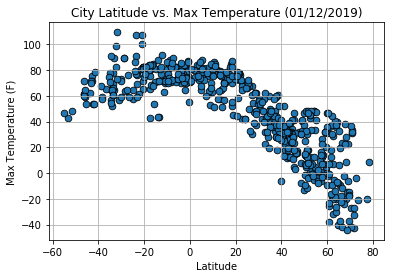

In [6]:
# Convert date from unix
ts = weather_data['Date'][0]
pulldate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')

fig, ax = plt.subplots()

# Select x,y
x = weather_data['Lat']
y = weather_data['Max Temp']

ax.scatter(x, y, s=45, linewidth=0.8, edgecolors='black', marker='o')

# Add labels and gridlines
plt.title(f"City Latitude vs. Max Temperature ({pulldate})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

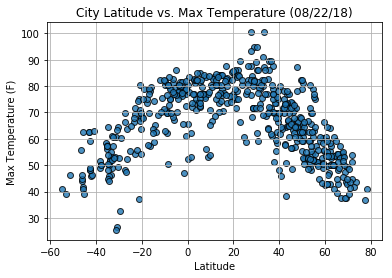

In [6]:
#hold example result for comparison purposes

#### Latitude vs. Humidity Plot

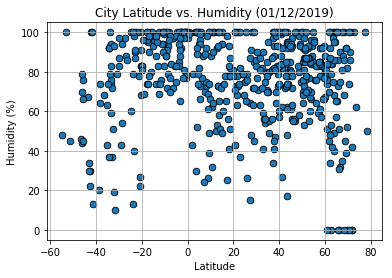

In [7]:
fig, ax = plt.subplots()

# Select x,y
x = weather_data['Lat']
y = weather_data['Humidity']

ax.scatter(x, y, s=45, linewidth=0.8, edgecolors='black', marker='o')

# Add labels and gridlines
plt.title(f"City Latitude vs. Humidity ({pulldate})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(top=105)
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

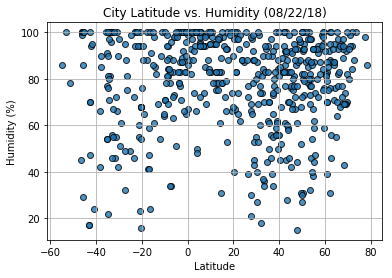

In [7]:
#hold example result for comparison purposes

#### Latitude vs. Cloudiness Plot

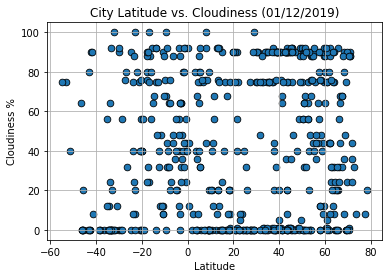

In [8]:
fig, ax = plt.subplots()

# Select x,y
x = weather_data['Lat']
y = weather_data['Cloudiness']

ax.scatter(x, y, s=45, linewidth=0.8, edgecolors='black', marker='o')

# Add labels and gridlines
plt.title(f"City Latitude vs. Cloudiness ({pulldate})")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

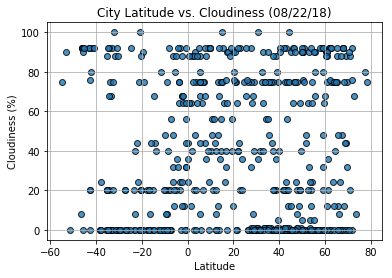

In [8]:
#hold example result for comparison purposes

#### Latitude vs. Wind Speed Plot

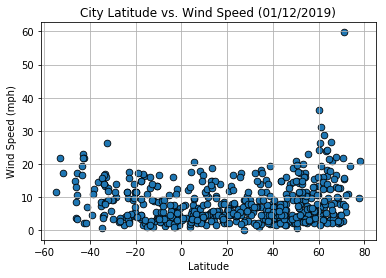

In [9]:
fig, ax = plt.subplots()

# Select x,y
x = weather_data['Lat']
y = weather_data['Wind Speed']

ax.scatter(x, y, s=45, linewidth=0.8, edgecolors='black', marker='o')

# Add labels and gridlines
plt.title(f"City Latitude vs. Wind Speed ({pulldate})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

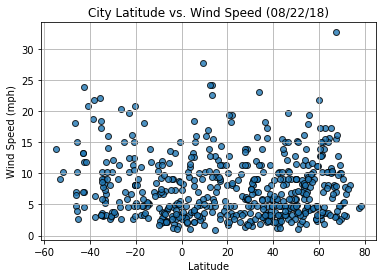

In [9]:
#hold example result for comparison purposes